# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [89]:
# your answer here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [32]:
# your answer here
employee=pd.read_csv('data\Employee.csv')
employee.head(2)


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [7]:
# Method 1
# your answer here
employee.groupby('Department').agg({'Salary':"mean"})


,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [21]:
# Method 2
# your answer here
employee.pivot_table(index="Department",values="Salary")


,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [23]:
# your answer here
employee.pivot_table(index="Department",columns="Title", values="Salary")


Title,VP,analyst,associate
Department,,,
HR,70.0,32.5,NaN
IT,70.0,32.5,60.0
Sales,NaN,NaN,55.0


#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [25]:
# your answer here
employee.pivot_table(index=["Department","Years"],columns="Title", values="Salary")

Title               VP  analyst  associate
Department Years                          
HR         2       NaN     30.0        NaN
           4       NaN     35.0        NaN
           8      70.0      NaN        NaN
IT         1       NaN     35.0        NaN
           2       NaN     30.0        NaN
           7       NaN      NaN       60.0
           8      70.0      NaN        NaN
Sales      2       NaN      NaN       55.0
           3       NaN      NaN       55.0

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [40]:
# your answer here
employee.pivot_table(index=["Department","Title"], values=["Salary"],aggfunc=["mean","count"])

mean  count
                     Salary Salary
Department Title                  
HR         VP          70.0      1
           analyst     32.5      2
IT         VP          70.0      1
           analyst     32.5      2
           associate   60.0      1
Sales      associate   55.0      2

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [39]:
# your answer here
employee.pivot_table(index=["Department","Title"], values=["Salary"],aggfunc=["median","min","max", "std"])

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [46]:
# your answer here
employee.pivot_table(index=["Department","Title"], values=["Salary"],aggfunc=["median","min","max", "std"])
# the  fill_value=0 doesn't work 

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [47]:
# your answer here
employee.pivot_table(index=["Department"], values=["Salary"],aggfunc=["count","sum"])


,count,sum
,Salary,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [50]:
# your answer here
employee.pivot_table(index=["Department","Title"], columns="Years", values=["Salary"],aggfunc='sum', fill_value=0)

Salary                    
Years                     1   2   3   4   7   8
Department Title                               
HR         VP             0   0   0   0   0  70
           analyst        0  30   0  35   0   0
IT         VP             0   0   0   0   0  70
           analyst       35  30   0   0   0   0
           associate      0   0   0   0  60   0
Sales      associate      0  55  55   0   0   0

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [ ]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [52]:
# your answer here
fitbit=pd.read_csv('data\Fitbit.csv')
fitbit.head(2)


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [61]:
# your answer here
fitbit.describe()


,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [62]:
# your answer here
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [64]:
# your answer here
fitbit[["Minutes Very Active","Steps"]].corr()


,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

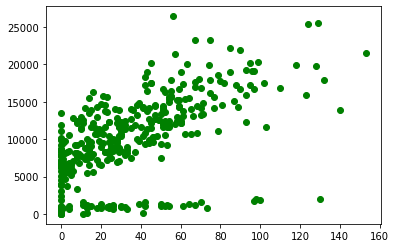

In [66]:
# your answer here
plt.scatter(fitbit["Minutes Very Active"],fitbit["Steps"],c="green")


#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# your answer here



#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [67]:
# your answer here
fitbit[["Minutes Sedentary","Steps"]].corr()

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

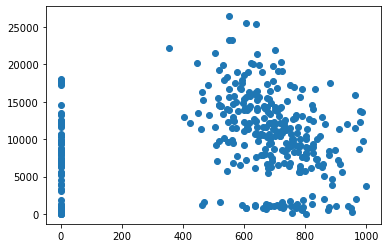

In [69]:
# your answer here
plt.scatter(fitbit["Minutes Sedentary"],fitbit["Steps"])

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [70]:
# your answer here
fitbit[["MinutesOfSleep","Steps"]].corr()


,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

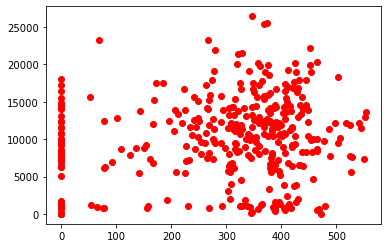

In [73]:
# your answer here
plt.scatter(fitbit["MinutesOfSleep"],fitbit["Steps"], c="red")


#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

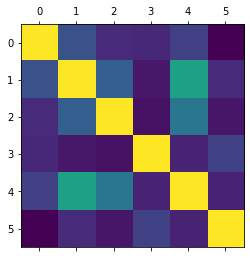

In [78]:
# your answer here
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

cor_fit=plt.matshow(fitbit[column].corr())
plt.show()


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [ ]:
# your answer here



# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [80]:
# your answer here
time_grades=pd.read_csv('data\Time_Grades.csv')
time_grades.head()


,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the time_grades dataset.

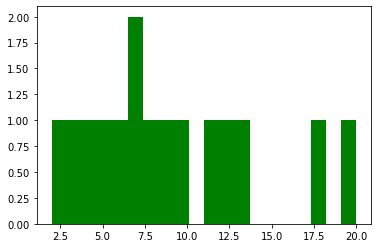

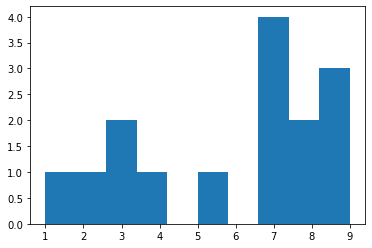

In [88]:
# your answer here
plt.hist(time_grades['Study time'],bins=20,color='green')
plt.show()
plt.hist(time_grades['Grade'],bins=10)
plt.show()


#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [90]:
# your answer here
time_grades.corr() ## Pearson correlation (posetively correlated)


,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [91]:
## Spearman Correlation
st.spearmanr(time_grades["Grade"],time_grades['Study time'])
# correlation=0.819658753036942, posetively correlated

SpearmanrResult(correlation=0.819658753036942, pvalue=0.00018377469445788485)

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

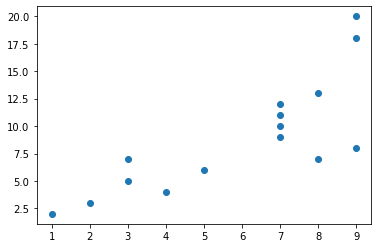

In [92]:
# your answer here
plt.scatter(time_grades["Grade"],time_grades['Study time'])
# they are posetively correlated


#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# your answer here
''' 
Pearson correlation evaluates the linear relationship between two continuous variables. 
Spearman correlation evaluates the monotonic relationship.''' 
